In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from itertools import chain
from scipy.spatial.distance import cosine
import math
import seaborn as sns

In [12]:
df = pd.read_csv("/content/drive/MyDrive/own/Schneider/Assignment 2/data/output/post_cluster.csv")

In [13]:
df = df.iloc[:, 2:]

In [14]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,embedding,labels
0,81145628,Movie,Norm of the North: King Sized Adventure,"['Richard Finn', 'Tim Maltby']","['Alan Marriott', 'Andrew Toth', 'Brian Dobson...","['United States', 'India', 'South Korea', 'Chi...",2019-09-09,2019,9,90,"['Children & Family Movies', 'Comedies']",Before planning an awesome wedding for his gra...,[-9.63099077e-02 -2.72850931e-01 2.28586629e-...,11
1,80117401,Movie,Jandino: Whatever it Takes,[''],['Jandino Asporaat'],['United Kingdom'],2016-09-09,2016,8,94,['Stand-Up Comedy'],Jandino Asporaat riffs on the challenges of ra...,[-0.23935783 -0.00351983 0.21843773 -0.051302...,12
2,80125979,Movie,#realityhigh,['Fernando Lebrija'],"['Nesta Cooper', 'Kate Walsh', 'John Michael H...",['United States'],2017-09-08,2017,6,99,['Comedies'],When nerdy high schooler Dani finally attracts...,[-0.30191478 0.04517872 0.1860977 -0.038697...,13
3,70304989,Movie,Automata,['Gabe Ibez'],"['Antonio Banderas', 'Dylan McDermott', 'Melan...","['Bulgaria', 'United States', 'Spain', 'Canada']",2017-09-08,2014,5,110,"['International Movies', 'Sci-Fi & Fantasy', '...","In a dystopian future, an insurance adjuster f...",[-0.24165763 0.09307828 -0.05463475 0.174758...,5
4,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"['Rodrigo Toro', 'Francisco Schultz']",['Fabrizio Copano'],['Chile'],2017-09-08,2017,8,60,['Stand-Up Comedy'],Fabrizio Copano takes audience participation t...,[-0.24047036 -0.14887013 0.27457607 -0.004533...,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,80085438,Movie,Frank and Cindy,['G.J. Echternkamp'],[''],['United States'],2016-04-01,2007,8,70,['Documentaries'],Frank was a rising pop star when he married Ci...,[ 0.06236578 -0.42172354 -0.01047069 -0.054907...,19
4261,80085439,Movie,Frank and Cindy,['G.J. Echternkamp'],"['Rene Russo', 'Oliver Platt', 'Johnny Simmons...",['United States'],2016-04-01,2015,5,102,"['Comedies', 'Dramas', 'Independent Movies']",A student filmmaker vengefully turns his camer...,[-0.13750222 0.01428486 0.27620843 -0.019271...,12
4262,80011846,Movie,Iverson,['Zatella Beatty'],['Allen Iverson'],['United States'],2016-04-01,2014,2,88,"['Documentaries', 'Sports Movies']",This unfiltered documentary follows the rocky ...,[-2.98055410e-01 -7.15429485e-02 1.86867014e-...,17
4263,80064521,Movie,Jeremy Scott: The People's Designer,['Vlad Yudin'],['Jeremy Scott'],['United States'],2016-04-01,2015,4,109,['Documentaries'],The journey of fashion designer Jeremy Scott f...,[-0.16880137 -0.0407051 0.35535735 -0.051180...,12


In [15]:
country = []
for i in df.country:
    for j in str(i)[1:-1].split(", "):
        country.append(j)
country_d = Counter(country)
len(country_d.keys())

108

In [16]:
genre = []
for i in df.listed_in:
    for j in str(i)[1:-1].split(", "):
        genre.append(j)
genre_d = Counter(genre)
len(genre_d.keys())

20

In [17]:
# to add
df['date_added'] = pd.to_datetime(df.date_added)
df['year'] = df.date_added.dt.year
df['month'] = df.date_added.dt.month
df['date'] = df.date_added.dt.day

In [18]:
# to add
df['country'] =  df["country"].apply(eval)
df['country_main'] = df.country.apply(lambda x: x[0])
df.country_main

0        United States
1       United Kingdom
2        United States
3             Bulgaria
4                Chile
             ...      
4260     United States
4261     United States
4262     United States
4263     United States
4264                  
Name: country_main, Length: 4265, dtype: object

In [19]:
# to add
num_country = []
for c in df.country:
    if len(c[0]) == 0:
        num_country.append(0)
    else:
        num_country.append(len(c))
df['num_country'] = num_country

In [20]:
# df['director'] = df.director.apply(eval)
final_dict = {}
director_dict = dict(Counter(list(chain.from_iterable(df.director))))
factor = 1.0/sum(director_dict.values())
normal_director_dict = {k: v*factor for k, v in director_dict.items()}

In [21]:
# to add
director_factor, num_d = [], []
for directors in df.director:
    if len(directors[0]) == 0:
        director_factor.append(0)
        num_d.append(0)
    else:
        director_factor.append(sum([normal_director_dict[i] for i in directors])/len(directors))
        num_d.append(len(directors))
df['director_factor'] = director_factor
df['num_directores'] = num_d

In [22]:
# to add
df['country_main'] = df.country_main.astype('category')
df['country_main'] = df.country_main.cat.codes

In [23]:
# to add
final_dict_cast = {}
cast_dict = dict(Counter(list(chain.from_iterable(df.cast))))
cast_factor = 1.0/sum(cast_dict.values())
normal_cast_dict = {k: v*cast_factor for k, v in cast_dict.items()}

In [24]:
# to add
num_c, cast_factor_list = [], []
# df['cast'] = df.cast.apply(eval)
for c in df.cast:
    if len(c[0]) == 0:
        num_c.append(0)
        cast_factor_list.append(0)
    else:
        num_c.append(len(c))
        cast_factor_list.append(sum([normal_cast_dict[i] for i in c])/len(c))
df['cast_factor'] = cast_factor_list
df['num_cast'] = num_c

In [25]:
# !pip install rake-nltk
# from rake_nltk import Rake
# r = Rake() # Uses stopwords for english from NLTK, and all puntuation characters.
# print (r.extract_keywords_from_text(df.description[0]))
# r.get_ranked_phrases() # To get keyword phrases ranked highest to lowest.

In [26]:
# to add
df['listed_in'] = df.listed_in.apply(eval)

In [27]:
selected_cols = ['labels', 'year', 'month', 'date', 'country_main', 'num_country', 'director_factor', 'num_directores', 'num_cast', 'cast_factor', 'duration', 'rating', 'release_year']

X_train, X_test, y_train, y_test = train_test_split(
    df[selected_cols],
    df.listed_in,
    test_size = 0.2
)

In [28]:
X_train.reset_index(drop = True, inplace=True)
X_test.reset_index(drop = True, inplace=True)

In [29]:
X_train.shape, X_test.shape

((3412, 13), (853, 13))

In [30]:
label_encoder = MultiLabelBinarizer()
train_label = label_encoder.fit_transform(y_train)
train_label_df = pd.DataFrame(train_label, columns = label_encoder.classes_)

test_label = label_encoder.transform(y_test)
test_label_df = pd.DataFrame(test_label, columns = label_encoder.classes_)

# Checking for correlations

Text(123.0, 0.5, 'Variables')

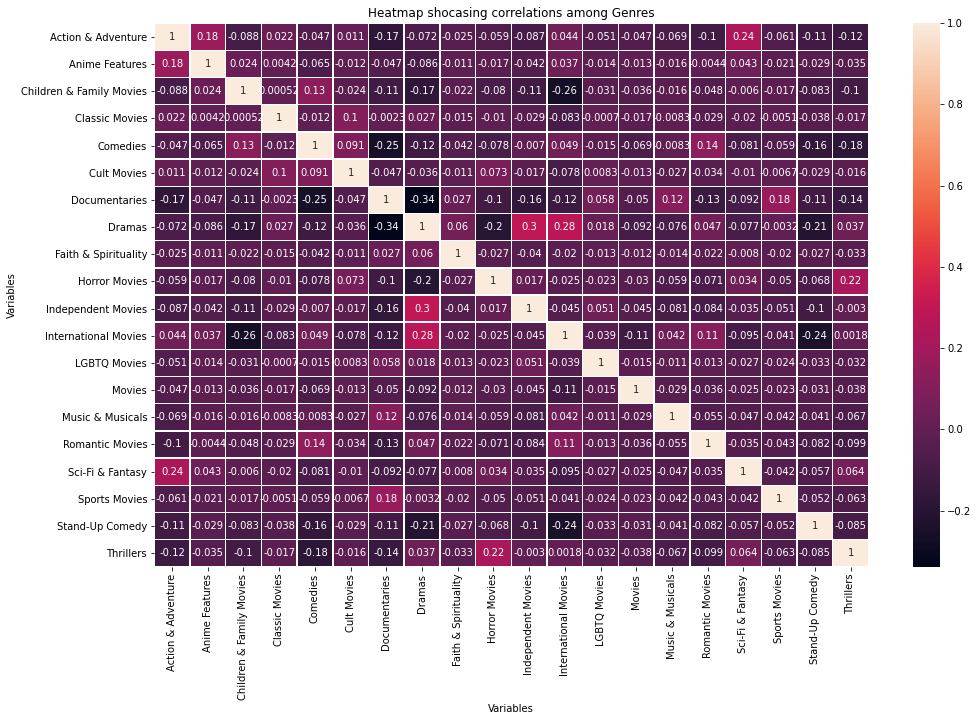

In [31]:
fig, ax = plt.subplots(figsize=(16,10))         
sns.heatmap(train_label_df.corr(), annot=True, linewidths=.5, ax=ax)
ax.set_title("Heatmap shocasing correlations among Genres")
ax.set_xlabel("Variables")
ax.set_ylabel("Variables")

Text(122.09375, 0.5, 'Variables')

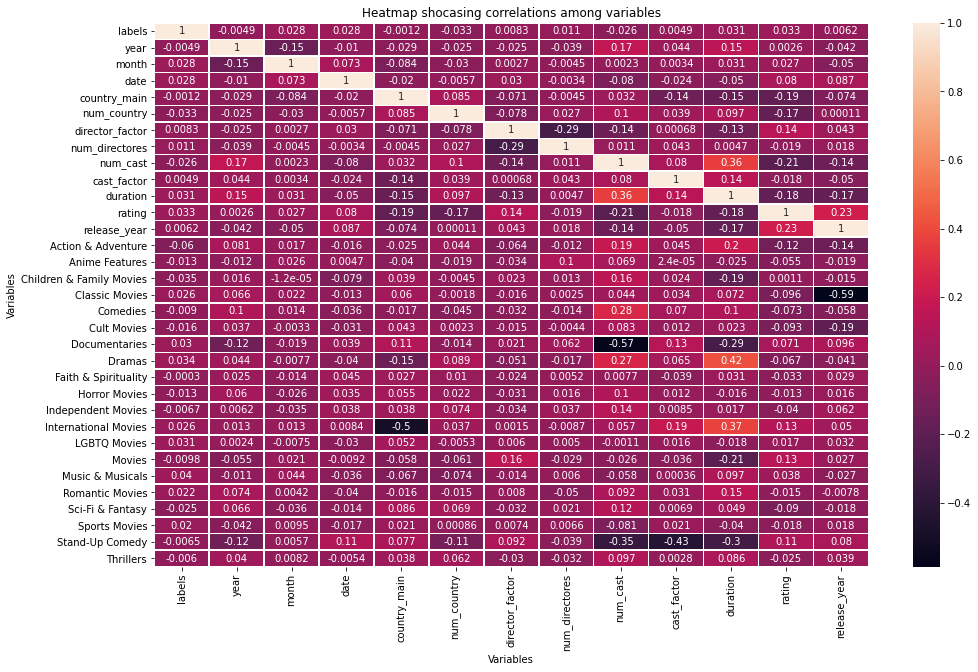

In [44]:
fig, ax = plt.subplots(figsize=(16,10))         
sns.heatmap(pd.concat([X_train, train_label_df], axis = 1).corr()[selected_cols], annot=True, linewidths=.5, ax=ax)
ax.set_title("Heatmap shocasing correlations among variables")
ax.set_xlabel("Variables")
ax.set_ylabel("Variables")

Text(122.09375, 0.5, 'Variables')

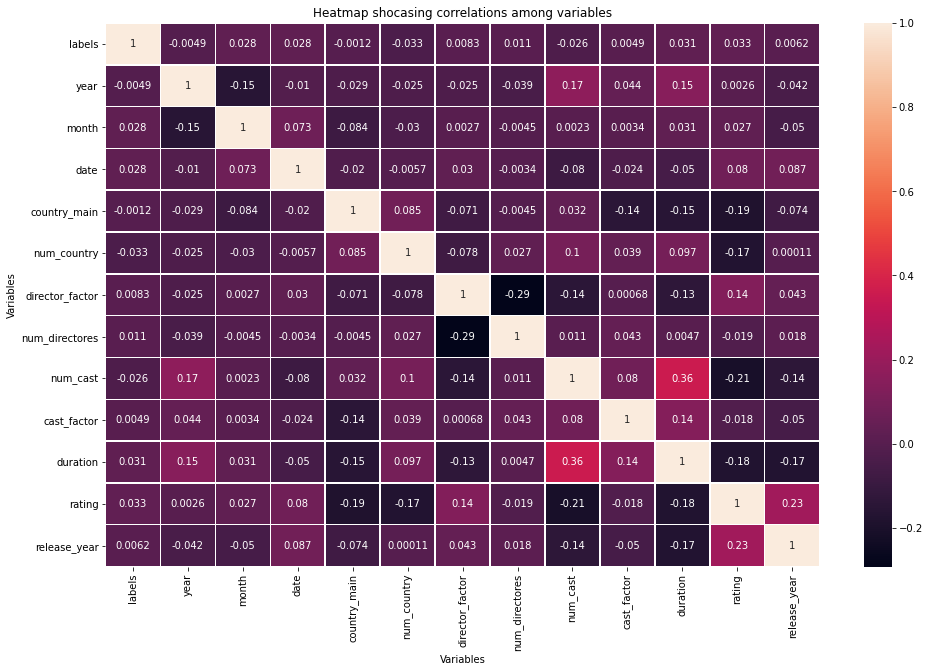

In [45]:
fig, ax = plt.subplots(figsize=(16,10))         
sns.heatmap(X_train.corr(), annot=True, linewidths=.5, ax=ax)
ax.set_title("Heatmap shocasing correlations among variables")
ax.set_xlabel("Variables")
ax.set_ylabel("Variables")

# other

In [ ]:
rf = RandomForestClassifier(
    n_estimators = 100
)

rf.fit(X_train, train_label_df)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
def eucledian_distance(x, y):
    return math.sqrt(sum([(i-j)**2 for i, j in zip(x, y)]))

def iou(x, y):
    return sum(x & y)/sum(x)

def manhattan_distance(x, y):
    return sum([math.fabs(i-j)for i, j in zip(x, y)])

In [ ]:
error_l2 = sum([eucledian_distance(i, j) for i, j in zip(test_label_df.values, rf.predict(X_test))])/len(test_label_df)
error_l1 = sum([manhattan_distance(i, j) for i, j in zip(test_label_df.values, rf.predict(X_test))])/len(test_label_df)
error_iou = sum([iou(i, j) for i, j in zip(test_label_df.values, rf.predict(X_test))])/len(test_label_df)

print ("The total error_l2 for X_test is {:.4f}".format(error_l2))
print ("The total error_l1 for X_test is {:.4f}".format(error_l1))
print ("The total error_iou for X_test is {:.4f}".format(error_iou))

The total error_l2 for X_test is 1.0231
The total error_l1 for X_test is 1.4467
The total error_iou for X_test is 0.0466


# Random Forest

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [71]:
parameters_rf = {
    'n_estimators': np.arange(10, 500, 50),
    'criterion': ['gini', 'enropy']
}

randomForest_gs = GridSearchCV(
    RandomForestClassifier(),
    parameters_rf, 
    cv = 3,
    refit = True,
    verbose = 1,
    n_jobs = -1
)

randomForest_gs.fit(X_train, train_label_df)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [74]:
pred_rf = randomForest_gs.best_estimator_.predict(X_test)

error_l2_rf = sum([eucledian_distance(i, j) for i, j in zip(test_label_df.values, pred_rf)])/len(test_label_df)
error_l1_rf = sum([manhattan_distance(i, j) for i, j in zip(test_label_df.values, pred_rf)])/len(test_label_df)
error_iou_rf = sum([iou(i, j) for i, j in zip(test_label_df.values, pred_rf)])/len(test_label_df)

print ("The total error_l2 for X_test is {:.4f}".format(error_l2_rf))
print ("The total error_l1 for X_test is {:.4f}".format(error_l1_rf))
print ("The total error_iou for X_test is {:.4f}".format(error_iou_rf))

The total error_l2 for X_test is 1.0370
The total error_l1 for X_test is 1.4396
The total error_iou for X_test is 0.4553


# KNN

In [75]:
parameters_knn = {
    'n_neighbors': np.arange(1, 15, 2), 
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn_gs = GridSearchCV(
    KNeighborsClassifier(), 
    parameters_knn,
    cv = 3,
    refit = True,
    verbose = 1,
    n_jobs = -1
)

knn_gs.fit(X_train, train_label_df)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   52.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [76]:
pred_knn = knn_gs.best_estimator_.predict(X_test)

error_l2_knn = sum([eucledian_distance(i, j) for i, j in zip(test_label_df.values, pred_knn)])/len(test_label_df)
error_l1_knn = sum([manhattan_distance(i, j) for i, j in zip(test_label_df.values, pred_knn)])/len(test_label_df)
error_iou_knn = sum([iou(i, j) for i, j in zip(test_label_df.values, pred_knn)])/len(test_label_df)

print ("The total error_l2 for X_test is {:.4f}".format(error_l2_knn))
print ("The total error_l1 for X_test is {:.4f}".format(error_l1_knn))
print ("The total error_iou for X_test is {:.4f}".format(error_iou_knn))

The total error_l2 for X_test is 1.1634
The total error_l1 for X_test is 1.7198
The total error_iou for X_test is 0.4097


# MLP Classifier

In [108]:
from sklearn.neural_network import MLPClassifier

In [116]:
param_mlp = {
    'hidden_layer_sizes': [(64, 32, 16), (256, 128, 64, 32)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate_init': [1e-4, 1e-3, 1e-2]
}

mlp_gs = GridSearchCV(
    MLPClassifier(), 
    param_mlp,
    cv = 3,
    refit = True,
    verbose = 1,
    n_jobs = -1
)

mlp_gs.fit(X_train, train_label_df)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 14.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         '

In [117]:
pred_mlp = mlp_gs.best_estimator_.predict(X_test)

error_l2_mlp = sum([eucledian_distance(i, j) for i, j in zip(test_label_df.values, pred_mlp)])/len(test_label_df)
error_l1_mlp = sum([manhattan_distance(i, j) for i, j in zip(test_label_df.values, pred_mlp)])/len(test_label_df)
error_iou_mlp = sum([iou(i, j) for i, j in zip(test_label_df.values, pred_mlp)])/len(test_label_df)

print ("The total error_l2 for X_test is {:.4f}".format(error_l2_mlp))
print ("The total error_l1 for X_test is {:.4f}".format(error_l1_mlp))
print ("The total error_iou for X_test is {:.4f}".format(1-error_iou_mlp))

The total error_l2 for X_test is 1.2054
The total error_l1 for X_test is 1.7268
The total error_iou for X_test is 0.6631


# Extra Tree Classifier

In [127]:
from sklearn.ensemble import ExtraTreesClassifier

In [128]:
parameters_etc = {
    'n_estimators': np.arange(10, 500, 50),
    'criterion': ['gini', 'enropy']
}

extratree_gs = GridSearchCV(
    ExtraTreesClassifier(),
    parameters_etc, 
    cv = 3,
    refit = True,
    verbose = 1,
    n_jobs = -1
)

extratree_gs.fit(X_train, train_label_df)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='deprecate

In [129]:
pred_etc = extratree_gs.predict(X_test)

error_l2_etc = sum([eucledian_distance(i, j) for i, j in zip(test_label_df.values, pred_etc)])/len(test_label_df)
error_l1_etc = sum([manhattan_distance(i, j) for i, j in zip(test_label_df.values, pred_etc)])/len(test_label_df)
error_iou_etc = sum([iou(i, j) for i, j in zip(test_label_df.values, pred_etc)])/len(test_label_df)

print ("The total error_l2 for X_test is {:.4f}".format(error_l2_etc))
print ("The total error_l1 for X_test is {:.4f}".format(error_l1_etc))
print ("The total error_iou for X_test is {:.4f}".format(1-error_iou_etc))

The total error_l2 for X_test is 1.0411
The total error_l1 for X_test is 1.4408
The total error_iou for X_test is 0.5528


# Delete all below

In [ ]:
test_label_df[idx_1]

In [131]:
idx_1 = test_label_df[test_label_df.sum(axis = 1) == 1].index
idx_2 = test_label_df[test_label_df.sum(axis = 1) == 2].index
idx_3 = test_label_df[test_label_df.sum(axis = 1) == 3].index

t1, t2, t3 = test_label_df[test_label_df.sum(axis = 1) == 1].values, test_label_df[test_label_df.sum(axis = 1) == 2].values, test_label_df[test_label_df.sum(axis = 1) == 3].values
p1, p2, p3 = pred_rf[idx_1], pred_rf[idx_2], pred_rf[idx_3]

In [ ]:
pred_rf[idx]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
error_l2_1 = sum([eucledian_distance(i, j) for i, j in zip(t1, p1)])/len(t1)
error_l2_2 = sum([eucledian_distance(i, j) for i, j in zip(t2, p2)])/len(t2)
error_l2_3 = sum([eucledian_distance(i, j) for i, j in zip(t3, p3)])/len(t3)

error_l1_1 = sum([manhattan_distance(i, j) for i, j in zip(t1, p1)])/len(t1)
error_l1_2 = sum([manhattan_distance(i, j) for i, j in zip(t2, p2)])/len(t2)
error_l1_3 = sum([manhattan_distance(i, j) for i, j in zip(t3, p3)])/len(t3)

error_iou_1 = sum([iou(i, j) for i, j in zip(t1, p1)])/len(t1)
error_iou_2 = sum([iou(i, j) for i, j in zip(t2, p2)])/len(t2)
error_iou_3 = sum([iou(i, j) for i, j in zip(t3, p3)])/len(t3)

In [ ]:
print (error_l2_1, error_l1_1, 1-error_iou_1)
print (error_l2_2, error_l1_2, 1-error_iou_2)
print (error_l2_3, error_l1_3, 1-error_iou_3)

0.45180129264958546 0.5348837209302325 0.3534883720930233
1.0441743393045144 1.427652733118971 0.5643086816720257
1.3953899335644668 2.1131498470948014 0.6085626911314985


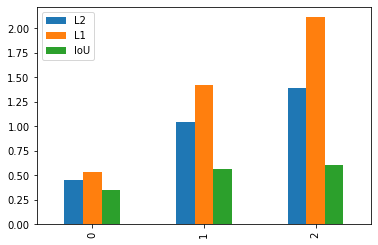

In [ ]:
res = [[error_l2_1, error_l1_1, 1-error_iou_1], [error_l2_2, error_l1_2, 1-error_iou_2], [error_l2_3, error_l1_3, 1-error_iou_3]]
res_df = pd.DataFrame(res, columns = ['L2', 'L1', 'IoU'])
res_df.plot(kind = 'bar', legend = True, title = "Error Rates per # of geners")

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

In [ ]:
''.join([i for i in df.description])

'Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first.Jandino Asporaat riffs on the challenges of raising kids and serenades the audience with a rousing rendition of "Sex on Fire" in his comedy show.When nerdy high schooler Dani finally attracts the interest of her longtime crush, she lands in the cross hairs of his ex, a social media celebrity.In a dystopian future, an insurance adjuster for a tech company investigates a robot killed for violating protocol and discovers a global conspiracy.Fabrizio Copano takes audience participation to the next level in this stand-up set while reflecting on sperm banks, family WhatsApp groups and more.A struggling couple can\'t believe their luck when they find a stash of money in the apartment of a neighbor who was recently murdered.Comedian and celebrity impersonator Joaquín Reyes decides to be his zesty self for a night of stories about buses, bathroom habits, r

In [ ]:
wordcloud = WordCloud(
    width = 800, height = 400, 
    background_color ='white', 
    stopwords = set(STOPWORDS), 
    min_font_size = 5).generate(''.join([i for i in df.description])) 

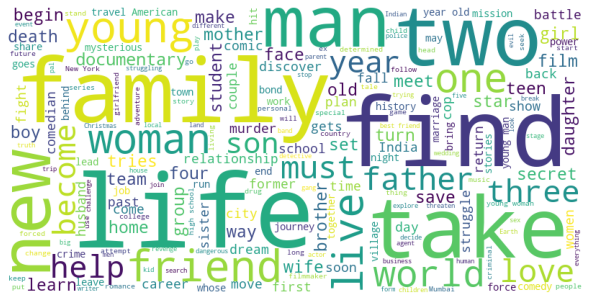

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [37]:
a = {'a': 1, 'b':0}
a_1 = {'a': 0, 'b':1}

q = pd.DataFrame(a, index=['a'])
q_1 = pd.DataFrame(a_1, index=['b'])

In [38]:
q_1

,a,b
b,0,1


In [40]:
pd.concat([q, q_1], axis = 0)

,a,b
a,1,0
b,0,1


In [2]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 2.6MB/s 


In [3]:
!pip install networkx
!git clone https://github.com/thunlp/OpenNE/
!pip install -e OpenNE/src

Cloning into 'OpenNE'...
remote: Enumerating objects: 1661, done.
remote: Total 1661 (delta 0), reused 0 (delta 0), pack-reused 1661
Receiving objects: 100% (1661/1661), 116.12 MiB | 24.60 MiB/s, done.
Resolving deltas: 100% (989/989), done.
Obtaining file:///content/OpenNE/src
  Running setup.py develop for openne


In [4]:
%cd /content/OpenNE/
!pip install -r requirements.txt
%cd src
!python setup.py install

/content/OpenNE
     |████████████████████████████████| 17.2MB 249kB/s 
     |████████████████████████████████| 1.6MB 38.8MB/s 
     |████████████████████████████████| 48.2MB 81kB/s 
     |████████████████████████████████| 59.5MB 67kB/s 
     |████████████████████████████████| 12.4MB 36.2MB/s 
  Created wheel for networkx: filename=networkx-2.0-py2.py3-none-any.whl size=1390392 sha256=8fd6df3dffa5e4f350495889e30903b784cedef818d31f129e4e8398d880607a
  Stored in directory: /root/.cache/pip/wheels/87/09/8b/4bbd744c97888c475862097465876a0f8fd0a5f35fd24fca4a
  Created wheel for gensim: filename=gensim-3.0.1-cp36-cp36m-linux_x86_64.whl size=13256244 sha256=0e04dd9c4dd84f1b7cdf99dd5e603ee59074623427b849bbbca2640c390ea6a0
  Stored in directory: /root/.cache/pip/wheels/c4/ef/2a/d11aca1eb49e24f25c262a523d9c3879d04847c00e2ee2ea33
Successfully built networkx gensim
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.0 which is incompatible.
ERROR: yellowb

/content/OpenNE/src
running install
running bdist_egg
running egg_info
writing openne.egg-info/PKG-INFO
writing dependency_links to openne.egg-info/dependency_links.txt
writing top-level names to openne.egg-info/top_level.txt
writing manifest file 'openne.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/openne
copying openne/__init__.py -> build/lib/openne
copying openne/sdne.py -> build/lib/openne
copying openne/__main__.py -> build/lib/openne
copying openne/line.py -> build/lib/openne
copying openne/lle.py -> build/lib/openne
copying openne/classify.py -> build/lib/openne
copying openne/tadw.py -> build/lib/openne
copying openne/walker.py -> build/lib/openne
copying openne/graph.py -> build/lib/openne
copying openne/hope.py -> build/lib/openne
copying openne/node2vec.py -> build/lib/openne
copying openne/gf.py -> build/lib/openne
copying openne/grarep.py -> build/lib

In [5]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [7]:
import openne

In [8]:
from skmultilearn.embedding import OpenNetworkEmbedder
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder

# import numpy
import sklearn.metrics as metrics

In [33]:
graph_builder = LabelCooccurrenceGraphBuilder(
    weighted=True, 
    include_self_edges=False)

openne_line_params = dict(batch_size=1000, order=3)

embedder = OpenNetworkEmbedder(
    graph_builder,
    'LINE',
    dimension = 5*train_label_df.values.shape[1],
    aggregation_function = 'add',
    normalize_weights=True,
    param_dict = openne_line_params
)

In [34]:
from skmultilearn.embedding import EmbeddingClassifier
from sklearn.ensemble import RandomForestRegressor
from skmultilearn.adapt import MLkNN

In [36]:
clf = EmbeddingClassifier(
    embedder,
    RandomForestRegressor(n_estimators=10),
    MLkNN(k=5)
)

clf.fit(X_train.values, train_label_df.values)

Pre-procesing for non-uniform negative sampling!
Pre-procesing for non-uniform negative sampling!
epoch:0 sum of loss:4.771037697792053
epoch:0 sum of loss:4.886079907417297
epoch:1 sum of loss:4.711365699768066
epoch:1 sum of loss:4.797790765762329
epoch:2 sum of loss:4.718768358230591
epoch:2 sum of loss:4.717175900936127
epoch:3 sum of loss:4.640044867992401
epoch:3 sum of loss:4.765688121318817
epoch:4 sum of loss:4.58140230178833
epoch:4 sum of loss:4.713913440704346
epoch:5 sum of loss:4.585420787334442
epoch:5 sum of loss:4.665583312511444
epoch:6 sum of loss:4.492520749568939
epoch:6 sum of loss:4.627097427845001
epoch:7 sum of loss:4.5573466420173645
epoch:7 sum of loss:4.575876295566559
epoch:8 sum of loss:4.5223347544670105
epoch:8 sum of loss:4.558923661708832
epoch:9 sum of loss:4.492651104927063
epoch:9 sum of loss:4.529020428657532


KeyError: ignored